In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [33]:
repo = 'ada-2024-project-adarable'

In [34]:
cd {repo}

/content/drive/MyDrive/ada-2024-project-adarable


In [35]:
movies_df = movies.sample(n=5, random_state=42)

In [37]:
!pip install requests beautifulsoup4 selenium webdriver_manager

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 17.3 MB/s eta 0:00:00


In [47]:
# Install the latest version of Google Chrome
!apt-get update
!apt-get install -y wget curl unzip
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt --fix-broken install -y


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,611 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,452 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,4

In [48]:
# Install ChromeDriver using webdriver_manager
!pip install -q webdriver_manager

In [62]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

# Set up Chrome options for headless mode and custom User-Agent
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--no-sandbox")  # Disable sandboxing for Colab
chrome_options.add_argument("--disable-dev-shm-usage")  # Prevent issues with shared memory
chrome_options.binary_location = '/usr/bin/google-chrome-stable'  # Path to Chrome binary

# Custom User-Agent to simulate a real browser
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

# Initialize the WebDriver using webdriver_manager to manage ChromeDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# Test the setup by printing the title of a webpage
driver.get("https://www.imdb.com")
print(driver.title)  # Example: prints the title of the IMDb page

# Close the driver after use
driver.quit()


IMDb: Ratings, Reviews, and Where to Watch the Best Movies & TV Shows


In [67]:
# Automatically reload all modules before executing code
%load_ext autoreload
%autoreload 2


In [110]:
movies['wikipedia_movie_id'].shape[0]

8954

In [112]:
import csv
import threading
from concurrent.futures import ThreadPoolExecutor
from imdb_scraper import ImdbScraper

# Initialize the scraper object
scraper = ImdbScraper()

# Lock to prevent race condition when writing to CSV
csv_writer_lock = threading.Lock()

# Function to scrape movie data and save it to CSV
def scrape_and_save_movie_data(movie_id):
    print(f"Scraping data for movie ID {movie_id}...")

    # Scrape the movie info using the ImdbScraper
    movie_info = scraper.get_imdb_infos(movie_id)

    # Check if data is available and write to CSV
    if movie_info:
        fieldnames = [
            "wikipedia_movie_id", "movie_box_office_revenue", "budget",
            "opening_weekend", "rating_score", "number_of_ratings",
            "producer", "release_year"
        ]

        # Write to CSV with thread safety
        with csv_writer_lock:
            with open("data/imdb_additional_movies_data.csv", mode="a", newline='', encoding="utf-8") as file:
                writer = csv.DictWriter(file, fieldnames=fieldnames)
                if file.tell() == 0:  # Write header if the file is empty
                    writer.writeheader()
                writer.writerow(movie_info)

        print(f"Data for movie ID {movie_id} saved successfully.")
    else:
        print(f"Failed to scrape data for movie ID {movie_id}")

# Function to setup the threads for parallel execution
def set_up_threads(movies):
    with ThreadPoolExecutor(max_workers=5) as executor:
        # Using map to execute scrape_and_save_movie_data concurrently
        executor.map(scrape_and_save_movie_data, movies)

if __name__ == "__main__":
    # Assuming `movies` is a list of movie IDs to scrape
    movies_id = movies['wikipedia_movie_id'][:100]  # Example: first 100 movie IDs

    # Start the parallel scraping process
    set_up_threads(movies_id)

    # Close the scraper after all threads have finished
    scraper.close()

Scraping data for movie ID 975900...
Scraping data for movie ID 10408933...
Scraping data for movie ID 171005...
Scraping data for movie ID 77856...
Scraping data for movie ID 612710...


Data for movie ID 612710 saved successfully.
Scraping data for movie ID 156558...


Data for movie ID 10408933 saved successfully.
Scraping data for movie ID 1364293...
Data for movie ID 975900 saved successfully.
Scraping data for movie ID 261237...
Data for movie ID 171005 saved successfully.
Scraping data for movie ID 12008535...
Data for movie ID 77856 saved successfully.
Scraping data for movie ID 4951456...


Data for movie ID 156558 saved successfully.
Scraping data for movie ID 5708633...


Data for movie ID 1364293 saved successfully.
Scraping data for movie ID 12053509...


Data for movie ID 12008535 saved successfully.
Scraping data for movie ID 7364373...


Data for movie ID 261237 saved successfully.
Scraping data for movie ID 7028314...
Data for movie ID 4951456 saved successfully.
Scraping data for movie ID 12788657...


Data for movie ID 5708633 saved successfully.
Scraping data for movie ID 3873713...


Data for movie ID 12053509 saved successfully.
Scraping data for movie ID 164387...
Data for movie ID 7364373 saved successfully.
Scraping data for movie ID 24282217...
Data for movie ID 7028314 saved successfully.
Scraping data for movie ID 7767613...
Data for movie ID 12788657 saved successfully.
Scraping data for movie ID 164388...


Data for movie ID 24282217 saved successfully.
Scraping data for movie ID 22985953...
Data for movie ID 3873713 saved successfully.
Scraping data for movie ID 3550323...
Data for movie ID 7767613 saved successfully.
Scraping data for movie ID 1765938...
Data for movie ID 164387 saved successfully.
Scraping data for movie ID 1305819...
Data for movie ID 164388 saved successfully.
Scraping data for movie ID 1031231...


Data for movie ID 22985953 saved successfully.
Scraping data for movie ID 6305925...


Data for movie ID 3550323 saved successfully.
Scraping data for movie ID 196176...
Data for movie ID 1305819 saved successfully.
Scraping data for movie ID 748616...
Data for movie ID 1765938 saved successfully.
Scraping data for movie ID 31505444...
Data for movie ID 1031231 saved successfully.
Scraping data for movie ID 336846...


Data for movie ID 6305925 saved successfully.
Scraping data for movie ID 3033993...


Data for movie ID 31505444 saved successfully.
Scraping data for movie ID 103021...
Data for movie ID 196176 saved successfully.
Scraping data for movie ID 1940449...
Data for movie ID 748616 saved successfully.
Scraping data for movie ID 6703617...
Data for movie ID 336846 saved successfully.
Scraping data for movie ID 362719...


Data for movie ID 3033993 saved successfully.
Scraping data for movie ID 4459059...


Data for movie ID 1940449 saved successfully.
Scraping data for movie ID 3681139...
Data for movie ID 6703617 saved successfully.
Scraping data for movie ID 5549065...
Data for movie ID 103021 saved successfully.
Scraping data for movie ID 171058...
Data for movie ID 362719 saved successfully.
Scraping data for movie ID 2608958...


Data for movie ID 4459059 saved successfully.
Scraping data for movie ID 2546429...


Data for movie ID 3681139 saved successfully.
Scraping data for movie ID 31686022...
Data for movie ID 2608958 saved successfully.
Scraping data for movie ID 24416479...
Data for movie ID 171058 saved successfully.
Scraping data for movie ID 12490207...
Data for movie ID 5549065 saved successfully.
Scraping data for movie ID 3883051...


Data for movie ID 31686022 saved successfully.
Scraping data for movie ID 1033297...
Data for movie ID 12490207 saved successfully.
Scraping data for movie ID 207680...
Data for movie ID 2546429 saved successfully.
Scraping data for movie ID 1858682...
Data for movie ID 24416479 saved successfully.
Scraping data for movie ID 7235116...
Data for movie ID 3883051 saved successfully.
Scraping data for movie ID 5254729...


Error during scraping: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
Failed to scrape data for movie ID 1033297
Scraping data for movie ID 19168185...
Error during scraping: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
Failed to scrape data for movie ID 7235116
Scraping data for movie ID 27504492...


KeyboardInterrupt: 

Error during scraping: HTTPConnectionPool(host='localhost', port=35205): Max retries exceeded with url: /session/fb1c77235cee671aade87ec38d3022f3/source (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f0b8bbaf6d0>: Failed to establish a new connection: [Errno 111] Connection refused'))
Failed to scrape data for movie ID 5254729
Scraping data for movie ID 20506905...


In [111]:
import csv
from imdb_scraper import ImdbScraper

# Initialize the scraper object
scraper = ImdbScraper()

movies_id = movies['wikipedia_movie_id'][:100]

def scrape_and_save_movie_data(movies):
    # List to hold the movie data
    movie_data_list = []

    for movie_id in movies:
        print(f"Scraping data for movie ID {movie_id}...")

        # Scrape the movie info using the ImdbScraper
        movie_info = scraper.get_imdb_infos(movie_id)

        # Check if data is available and add it to the list
        if movie_info:
            movie_data_list.append(movie_info)
        else:
            print(f"Failed to scrape data for movie ID {movie_id}")

    # Define CSV file path
    csv_file_path = "data/imdb_additional_movies_data.csv"

    # Column names for the CSV file
    fieldnames = [
        "wikipedia_movie_id", "movie_box_office_revenue", "budget",
        "opening_weekend", "rating_score", "number_of_ratings",
        "producer", "release_year"
    ]

    # Write the collected movie data to a CSV file
    with open(csv_file_path, mode="w", newline='', encoding="utf-8") as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)

        # Write the header
        writer.writeheader()

        # Write the movie data
        for movie_info in movie_data_list:
            writer.writerow(movie_info)

    print(f"Movie data saved to {csv_file_path}.")

    # Close the scraper
    scraper.close()

scrape_and_save_movie_data(movies_id)

Scraping data for movie ID 975900...
Scraping data for movie ID 10408933...
Scraping data for movie ID 171005...
Scraping data for movie ID 77856...
Scraping data for movie ID 612710...
Scraping data for movie ID 156558...
Scraping data for movie ID 1364293...
Scraping data for movie ID 261237...
Scraping data for movie ID 12008535...
Scraping data for movie ID 4951456...
Scraping data for movie ID 5708633...
Scraping data for movie ID 12053509...
Scraping data for movie ID 7364373...
Scraping data for movie ID 7028314...
Scraping data for movie ID 12788657...
Scraping data for movie ID 3873713...
Scraping data for movie ID 164387...
Scraping data for movie ID 24282217...
Scraping data for movie ID 7767613...
Scraping data for movie ID 164388...
Scraping data for movie ID 22985953...
Scraping data for movie ID 3550323...
Scraping data for movie ID 1765938...
Scraping data for movie ID 1305819...
Scraping data for movie ID 1031231...
Scraping data for movie ID 6305925...
Scraping data f

In [5]:
import pandas as pd
import re
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download necessary NLTK data (run once if needed)
nltk.download('punkt')        # For tokenization
nltk.download('stopwords')    # For stopwords
nltk.download('wordnet')      # For lemmatization

# Initialize necessary NLP tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()  # For Lemmatization
stemmer = PorterStemmer()         # For Stemming (optional)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
movies = pd.read_csv('../data/processed/merged_movies.csv')
characters = pd.read_csv('../data/MovieSummaries/character.metadata.tsv', sep = '\t', header = None)

name_clusters = pd.read_csv('../data/MovieSummaries/name.clusters.txt', sep = '\t', header = None)
summaries = pd.read_csv('../data/processed/summaries_preprocessed.csv')
tv_tropes = pd.read_csv('../data/MovieSummaries/tvtropes.clusters.txt', sep = '\t', header = None)

In [7]:
movies.sample(2)

,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
7385,2533907,/m/07lgkr,8½ Women,1999.0,424123.0,110.0,['English Language'],"['Germany', 'Netherlands', 'United Kingdom', '...","['Drama', 'Comedy']"
7602,20898157,/m/05b08zq,Dear John,2010.0,114977104.0,108.0,['English Language'],['United States of America'],"['Romantic drama', 'Romance Film', 'Film adapt..."


In [8]:
characters.sample(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
447477,6049002,/m/0fmhg9,2005-01-20,NaN,1957-06-17,M,1.73,/m/013xrm,Joachim Król,47.0,/m/0cgnkbt,NaN,/m/02ptshp
113119,11389149,/m/02r9vpx,1982-10-09,NaN,1953-04-08,M,NaN,NaN,Nagare Hagiwara,29.0,/m/0gdn277,NaN,/m/0gdlfj4


In [9]:
name_clusters.sample(2)

,0,1
1776,Harry Palmer,/m/04dj1dy
2489,Albert Wesker,/m/08nbk4b


In [10]:
summaries.sample(2)

,wikipedia_movie_id,plot_summary,clean_plot_summary,tokenized_plot_summary,filtered_tokens,lemmatized_tokens
24660,876728,Kermit the Frog enjoys a relaxing afternoon i...,kermit the frog enjoys a relaxing afternoon in...,"['kermit', 'the', 'frog', 'enjoys', 'a', 'rela...","['kermit', 'frog', 'enjoys', 'relaxing', 'afte...","['kermit', 'frog', 'enjoys', 'relaxing', 'afte..."
42095,19908169,The film is narrated by a man as he is in a pr...,the film is narrated by a man as he is in a pr...,"['the', 'film', 'is', 'narrated', 'by', 'a', '...","['film', 'narrated', 'man', 'prison', 'halluci...","['film', 'narrated', 'man', 'prison', 'halluci..."


In [11]:
tv_tropes.sample(2)

,0,1
80,casanova,"{""char"": ""Giacomo Casanova"", ""movie"": ""Casanov..."
191,doormat,"{""char"": ""Harry Dunne"", ""movie"": ""Dumb & Dumbe..."


In [12]:
name_clusters.columns = ['name', 'freebase_movie_id']
characters.columns = ['wikipedia_movie_id', 'freebase_movie_id', 'movie_release_date', 'character_name', 'actor_birth', 'actor_gender', 'actor_height', 'actor_ethnicity', 'actor_name', 'actor_age', 'freebase_character_map', 'freebase_character_id', 'freebase_actor_id']


In [13]:
characters=characters.dropna(subset=['wikipedia_movie_id', 'character_name'])

Compare size of character, movie, and movie summary datasets.
Keep only the movies which index is common between the 3 sets

In [14]:
print("Number of movies:", movies.shape[0])
print("Number of summaries:", summaries.shape[0])
n_movie_in_characters = characters.drop_duplicates(subset='wikipedia_movie_id', keep='first')
print("Number of movies where we know the characters:", n_movie_in_characters.shape[0])

Number of movies: 8954
Number of summaries: 42303
Number of movies where we know the characters: 32571


In [15]:
common_index = movies['wikipedia_movie_id'].isin(summaries['wikipedia_movie_id']) & movies['wikipedia_movie_id'].isin(characters['wikipedia_movie_id'])
filtered_movies = movies[common_index]

In [16]:
print(filtered_movies.shape[0])

6989


In [17]:
tv_tropes.columns = ['trope', 'details']
tv_tropes['details'] = tv_tropes['details'].apply(eval)
tv_tropes = tv_tropes.join(pd.json_normalize(tv_tropes['details'])).drop(columns=['details'])

In [18]:
tv_tropes.sample(2)

,trope,char,movie,id,actor
345,loveable_rogue,Harold Hill,The Music Man,/m/04hv61w,Matthew Broderick
43,brainless_beauty,Buffy Summers,Buffy the Vampire Slayer,/m/0jvy0r,Kristy Swanson


In [19]:
tv_tropes.columns = [
    'trope',
    'character_name',          # Change `char` to `character_name`
    'movie_name',              # Change `movie` to `movie_name`
    'freebase_movie_id',       # Change `id` to `freebase_movie_id`
    'actor_name'               # Change `actor` to `actor_name`
]

In [20]:
trope_counts = tv_tropes['trope'].value_counts().reset_index()
trope_counts.columns = ['trope', 'count']

In [ ]:
# Display the most common tropes
print("Most Common Tropes:")
print(trope_counts.head(5))  # Display top 10 for quick inspection

Most Common Tropes:
                         trope  count
0            crazy_jealous_guy     25
1  corrupt_corporate_executive     23
2                 byronic_hero     17
3              psycho_for_hire     16
4            father_to_his_men     15


In [ ]:
#!pip install scipy

In [ ]:
#!pip install --upgrade sympy transformers

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import pandas as pd

# Load the model and encode tropes
model = SentenceTransformer('all-MiniLM-L6-v2')
tropes = tv_tropes['trope'].tolist()  # Assuming tv_tropes is a DataFrame with a 'trope' column
trope_embeddings = model.encode(tropes)

# Set the number of clusters (archetypes) you want
num_clusters = 10  # Adjust this based on how many distinct categories you want

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(trope_embeddings)

# Assign labels to each trope
tv_tropes['category'] = labels

# Remove duplicates within each category
category_summary = tv_tropes.groupby('category')['trope'].apply(lambda x: list(set(x)))

# Display the cleaned-up representative tropes for each category
print(category_summary)


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

category
0                               [ditz, klutz, doormat]
1    [final_girl, master_swordsman, gentleman_thief...
2    [ophelia, bounty_hunter, retired_outlaw, playf...
3    [jerk_jock, fastest_gun_in_the_west, arrogant_...
4    [corrupt_corporate_executive, stupid_crooks, m...
5    [self_made_man, henpecked_husband, father_to_h...
6    [hardboiled_detective, dirty_cop, drill_sargea...
7    [crazy_survivalist, romantic_runnerup, grumpy_...
8    [brainless_beauty, prima_donna, pupil_turned_t...
9    [stoner, slacker, storyteller, dean_bitterman,...
Name: trope, dtype: object


### Category Interpretation

1. **Category 0**: `[doormat, ditz, klutz]`
   - **Interpretation**: This category likely represents **"awkward or submissive characters"**. Characters in this category might be shy, prone to accidents, or easy to push around, which could include "sidekick" or "comic relief" roles.

   => Category 0: Awkward

2. **Category 1**: `[tranquil_fury, gentleman_thief, granola_person]`
   - **Interpretation**: This group seems to represent **"calm but driven characters with a moral code"**. They could include characters who are calm on the surface but have a strong underlying purpose or anger, like a "gentle avenger" or "principled rebel."

   => Category 1: Principled


3. **Category 2**: `[playful_hacker, adventurer_archaeologist, egotistical_genius]`
   - **Interpretation**: This category likely captures **"adventurous, clever, and sometimes arrogant characters"**. These are individuals who are both intelligent and risk-takers, often fitting roles like "brilliant explorers" or "quirky geniuses."

   => Category 2: Adventurous


4. **Category 3**: `[coward, jerk_jock, fastest_gun_in_the_west, arrogant_kungfu_guy]`
   - **Interpretation**: This category appears to represent **"overconfident and sometimes antagonistic characters"**. These could be characters who are cocky, competitive, or even bullies, fitting stereotypes like "school bullies" or "rival fighters."

   => Category 3: Arrogant

5. **Category 4**: `[stupid_crooks, corrupt_corporate_executive, morally_bankrupt_banker]`
   - **Interpretation**: This category likely includes **"villainous or morally corrupt characters"**. Characters here may be criminals or unethical businesspeople, fitting the "greedy villains" or "corrupt officials" archetype.

   => Category 4: Villainous

6. **Category 5**: `[henpecked_husband, big_man_on_campus, self_made_man]`
   - **Interpretation**: This category might represent **"socially or traditionally defined men"**. These are characters who play into traditional roles or social expectations, like the "overbearing husband" or the "popular guy."

   => Category 5: Traditional

7. **Category 6**: `[officer_and_a_gentleman, drill_sargeant_nasty, tough_love_teacher]`
   - **Interpretation**: This category includes **"tough but disciplined authority figures"**. These are characters who might be stern or strict but often have a moral or mentoring purpose, such as "strict mentors" or "authoritarian leaders."

   => Category 6: Disciplinarian

8. **Category 7**: `[grumpy_old_man, hitman_with_a_heart, crazy_jealous_guy]`
   - **Interpretation**: This category likely captures **"tough or emotionally complex characters"**. Characters here might be gruff or rough around the edges but have softer or more complicated motives, like "reluctant protectors" or "emotionally intense characters."

   => Category 7: Complex

9. **Category 8**: `[brainless_beauty, dumb_blonde, dumb_muscle, pretty_boy]`
   - **Interpretation**: This category appears to represent **"attractive but stereotypically 'dim-witted' characters"**. These characters may rely on their looks more than intellect, often fitting roles like "eye candy" or "muscle without brains."

   => Category 8: Attractive

10. **Category 9**: `[dean_bitterman, storyteller, loser_protagonist]`
    - **Interpretation**: This group could include **"underdog or unconventional protagonists"**. These characters might not be typical heroes but often have their own unique appeal, like "unlikely heroes" or "underdogs with a story to tell."
  
   => Category 9: Underdog

In [ ]:
import numpy as np

# Calculate centroids
centroids = kmeans.cluster_centers_

# Find the closest trope to each centroid
cluster_labels = []
for i, centroid in enumerate(centroids):
    distances = np.linalg.norm(trope_embeddings - centroid, axis=1)
    closest_index = np.argmin(distances)
    cluster_labels.append(tropes[closest_index])

for i, label in enumerate(cluster_labels):
    print(f"Archetype {i}: {label}")

Archetype 0: ditz
Archetype 1: byronic_hero
Archetype 2: bounty_hunter
Archetype 3: arrogant_kungfu_guy
Archetype 4: corrupt_corporate_executive
Archetype 5: father_to_his_men
Archetype 6: psycho_for_hire
Archetype 7: crazy_jealous_guy
Archetype 8: brainless_beauty
Archetype 9: stoner


We choose high-level categories (e.g., Awkward, Principled, Villainous) to provide a broad view of character types, making it easier to analyze trends across numerous movies efficiently. These categories capture general personality or role traits, allowing us to group characters without overwhelming detail.

In [ ]:
# Define the categories
categories = [
    "Awkward",       # Category 0
    "Principled",    # Category 1
    "Adventurous",   # Category 2
    "Arrogant",      # Category 3
    "Villainous",    # Category 4
    "Traditional",   # Category 5
    "Disciplinarian",# Category 6
    "Complex",       # Category 7
    "Attractive",    # Category 8
    "Underdog"       # Category 9
]

print(categories)

['Awkward', 'Principled', 'Adventurous', 'Arrogant', 'Villainous', 'Traditional', 'Disciplinarian', 'Complex', 'Attractive', 'Underdog']


Add trope to each character. This will be an additional element for sentiment analysis.

In [ ]:
merged_characters = characters.merge(tv_tropes[['character_name', 'trope', 'actor_name']],
                                      on=['character_name', 'actor_name'],
                                      how='left',
                                      indicator=True)

In [ ]:
merged_characters.sample(2)

,wikipedia_movie_id,freebase_movie_id,movie_release_date,character_name,actor_birth,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_character_map,freebase_character_id,freebase_actor_id,trope,_merge
48396,19240936,/m/04lfyn6,2009-09-14,Buddy Fuller,1955-01-17,M,NaN,NaN,Steve Earle,54.0,/m/0djc95b,/m/0h5rzfs,/m/01bpc9,NaN,left_only
191384,194664,/m/01bn3l,1994-05-23,Miss Sharon Stone,1966-08-14,F,1.68,/m/02ctzb,Halle Berry,27.0,/m/045xbj9,/m/0b3v94t,/m/03knl,NaN,left_only


To find entries in the tv_tropes DataFrame that don't have a corresponding entry in the characters

In [ ]:
# Count entries in characters that do not have trope values
count_without_tropes = merged_characters[merged_characters['trope'].isnull()].shape[0]

# Display the count
print(f"Number of characters without trope values: {count_without_tropes}")


Number of characters without trope values: 192207


Since we have a lot of characters without trope values, we cannot rely only on the trope, we can use the summaries as well.

In [ ]:
characters = merged_characters

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

We will add the number of mentions in the plot summary of each character. Detecting character mentions enhances sentiment analysis by providing personalized insights and contextual understanding of how audiences feel about specific characters in the narrative. If it has no mention, then we cannot extract the category of the character from the plot.

In [ ]:
characters['mentions']=int(0)

In [ ]:
!pip install fuzzywuzzy

In [ ]:
# Check unique entries in filtered_movies
unique_filtered_movies = filtered_movies['wikipedia_movie_id'].nunique()
total_filtered_movies = filtered_movies.shape[0]

# Check unique entries in summaries
unique_summaries = summaries['wikipedia_movie_id'].nunique()
total_summaries = summaries.shape[0]

print(f"Unique entries in filtered_movies: {unique_filtered_movies}, Total entries: {total_filtered_movies}")
print(f"Unique entries in summaries: {unique_summaries}, Total entries: {total_summaries}")

Unique entries in filtered_movies: 6927, Total entries: 6989
Unique entries in summaries: 42303, Total entries: 42303


In [ ]:
filtered_movies = filtered_movies.drop_duplicates()

All entries in both DataFrames are unique. We can merge on 'wikipedia_movie_id'. Wait they are not unique

In [ ]:
characters_with_tropes = characters[characters['trope'].notna()]

# 2. Identify movie IDs with summaries
movie_ids_with_summaries = set(summaries['wikipedia_movie_id'])

# 3. Keep characters that have either a trope or a summary
characters_with_summaries = characters[characters['wikipedia_movie_id'].isin(movie_ids_with_summaries)]

combined_characters = pd.concat([characters_with_tropes, characters_with_summaries]).drop_duplicates()
df_characters = combined_characters.drop_duplicates(subset='character_name')

print("Number of charcaters:", characters.shape[0])
print("Number of characters with either a trope or a summary:", df_characters.shape[0])

Number of charcaters: 192928
Number of characters with either a trope or a summary: 96235


In [ ]:
character_counts_per_movie = df_characters.groupby('wikipedia_movie_id').size().reset_index(name='character_count')

# Display character counts per movie
print("\nNumber of characters per movie:")
print(character_counts_per_movie)


Number of characters per movie:
       wikipedia_movie_id  character_count
0                    3217               10
1                    3746               11
2                    3837               13
3                    3947                8
4                    4227                1
...                   ...              ...
20220            36724042                1
20221            36814246                5
20222            36956792               23
20223            37373877                2
20224            37501922                2

[20225 rows x 2 columns]


We can see numerous characters per movie. We only to primarily keep the main character actors. We will use the number of mentions to consider only the main characters, for this we will use name entity recognition and fuzzy matching.

This takes too long maybe we need to use the imdb dataset to only keep the main characters.

In [ ]:
filtered_movies.sample(2)

,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
5083,11643011,/m/02rmhgg,Madeline,1998.0,36967750.0,88.0,"['French Language', 'English Language', 'Spani...","['France', 'United States of America']","['Family Film', ""Children's"", 'Adventure', 'Co..."
1208,5224,/m/01lsl,Citizen Kane,1941.0,1585634.0,119.0,['English Language'],['United States of America'],"['Film à clef', 'Epic', 'Black-and-white', 'My..."


In [ ]:
imdb_movies = pd.read_csv('../data/raw/imdb_5000_movies.csv')

In [ ]:
imdb_movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
imdb_movies.sample(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2388,Color,Danny Pang,23.0,107.0,15.0,27.0,Angelica Lee,82.0,NaN,Action,...,4.0,Chinese,China,PG-13,NaN,2013.0,39.0,5.7,1.85,124
4131,Color,Marcio Garcia,9.0,85.0,74.0,47.0,Kristi Clainos,652.0,NaN,Action|Drama|Thriller,...,9.0,English,Brazil,NaN,3000000.0,2013.0,124.0,5.5,2.35,433


In [ ]:
imdb_movies['movie_title'] = imdb_movies['movie_title'].str.strip().str.replace(u'\xa0', '')
imdb_selected = imdb_movies[['movie_title', 'title_year', 'actor_1_name', 'actor_2_name', 'actor_3_name']]

merged_movies = pd.merge(
    filtered_movies, imdb_selected,
    left_on=['movie_name', 'movie_release_date'],
    right_on=['movie_title', 'title_year'],
    how='inner'
)

final_characters = df_characters.merge(merged_movies[['wikipedia_movie_id', 'actor_1_name', 'actor_2_name', 'actor_3_name']],
                                        on='wikipedia_movie_id',
                                        how='inner')


In [ ]:
final_characters.shape[0]

26853

In [ ]:
final_characters = final_characters[
    (final_characters['actor_name'].isin(final_characters['actor_1_name'])) |
    (final_characters['actor_name'].isin(final_characters['actor_2_name']))
]

print(f"Number of final characters: {final_characters.shape[0]}")

Number of final characters: 6715


In [ ]:
print("Number of characters:", characters.shape[0])
print("Number of filtered characters:", final_characters.shape[0])

Number of characters: 192928
Number of filtered characters: 6715


In [ ]:
columns_to_drop = ['_merge', 'actor_1_name', 'actor_2_name', 'actor_3_name']
final_characters = final_characters.drop(columns=columns_to_drop)

We will only keep the movies where we have the relevant characters.

In [ ]:
valid_wikipedia_ids = final_characters['wikipedia_movie_id'].unique()
filtered_merged_movies = merged_movies[merged_movies['wikipedia_movie_id'].isin(valid_wikipedia_ids)]

In [ ]:
print("Number of movies before:", merged_movies.shape[0])
print("Number of filtered movies:", filtered_merged_movies.shape[0])

Number of movies before: 3069
Number of filtered movies: 2555


In [ ]:
initial_characters = pd.read_csv('../data/MovieSummaries/character.metadata.tsv', sep = '\t', header = None)
initial_characters.columns = ['wikipedia_movie_id', 'freebase_movie_id', 'movie_release_date', 'character_name', 'actor_birth', 'actor_gender', 'actor_height', 'actor_ethnicity', 'actor_name', 'actor_age', 'freebase_character_map', 'freebase_character_id', 'freebase_actor_id']
initial_characters=initial_characters.dropna(subset=['wikipedia_movie_id', 'character_name'])

In [ ]:
# Function to extract the release year from the date
def extract_release_year(date_str):
    try:
        # Attempt to extract the year from the 'YYYY-MM-DD' format
        return pd.to_datetime(date_str).year
    except (ValueError, TypeError):
        try:
            # Attempt to extract the year from 'YYYY' format
            return int(date_str)
        except ValueError:
            return None  # Return None for invalid or missing dates

initial_characters['movie_release_date'] = initial_characters['movie_release_date'].apply(extract_release_year)

<Figure size 1200x600 with 0 Axes>

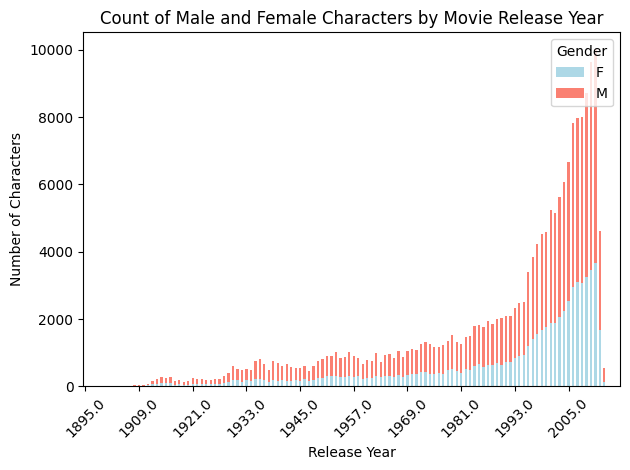

In [ ]:
# Count the number of male and female characters per release year
gender_counts = initial_characters.groupby(['movie_release_date', 'actor_gender']).size().unstack(fill_value=0)

# Plotting the results
plt.figure(figsize=(12, 6))
gender_counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Count of Male and Female Characters by Movie Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Characters')
plt.xticks(rotation=45)
plt.gca().set_xticks(range(0, len(gender_counts.index), max(1, len(gender_counts.index) // 10)))
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
characters['movie_release_date'] = characters['movie_release_date'].apply(extract_release_year)
main_characters = characters

In [ ]:
main_characters.sample(6)

,wikipedia_movie_id,freebase_movie_id,movie_release_date,character_name,actor_birth,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_character_map,freebase_character_id,freebase_actor_id,trope,_merge,mentions,actor_1_name,actor_2_name,actor_3_name
22637,261402,/m/01msrb,1970,Azeem,1937-06-01,M,1.880,/m/0x67,Morgan Freeman,54.0,/m/04xg29l,/m/04xg256,/m/055c8,NaN,left_only,0,Alan Rickman,Morgan Freeman,Michael Wincott
18504,4180278,/m/0bnhmx,1970,Inspector Gadget / Robo Gadget / John Brown,1962-03-21,M,1.730,/m/041rx,Matthew Broderick,37.0,/m/0jzykr,/m/0h145pp,/m/01vlj1g,NaN,left_only,1,Matthew Broderick,Rene Auberjonois,Rupert Everett
1398,705267,/m/0348n5,1970,Detective Rodriguez,NaN,M,NaN,NaN,Nick Damici,NaN,/m/0bj6mn_,/m/0bj6mp2,/m/0bj6mp9,NaN,left_only,0,Jennifer Jason Leigh,Nick Damici,Susan Gardner
26319,29650834,/m/0fq2d51,1970,Matt Weston,1976-10-23,M,1.880,/m/044038p,Ryan Reynolds,35.0,/m/0gvxh3v,/m/0gwgb2g,/m/036hf4,NaN,left_only,0,Denzel Washington,Ryan Reynolds,Sam Shepard
18154,20181491,/m/047wh1,1970,Daena,1978-12-23,F,1.750,/m/044038p,Estella Warren,22.0,/m/02vbkd_,/m/0bf2fjb,/m/02c_q_,NaN,left_only,0,Cary-Hiroyuki Tagawa,Estella Warren,Erick Avari
20885,28891330,/m/0g56t9t,1970,Mr. Rzykruski,1928-06-20,M,1.854,/m/048z7l,Martin Landau,84.0,/m/0gwhq4p,/m/0gwhq4s,/m/01mqnr,NaN,left_only,0,Martin Landau,Catherine O'Hara,Atticus Shaffer


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline

nltk.download('vader_lexicon')

We will perform sentiment analysis on movie plots using two methods: VADER and a transformer model. It processes the plots in chunks for the transformer and aggregates sentiment scores. Results for each character in the movies are collected into a DataFrame.

1. **Data Preparation**:
   - Merged character data with TV tropes data, ensuring to include all character entries and their associated tropes where available.
   - Added the number of mentions in the plot summary based on named entity recognition

2. **Sentiment Analysis Setup**:
   - Initialized VADER and a transformer-based sentiment analysis model (DistilBERT) to evaluate sentiment on plot summaries and character tropes.
   - Implemented a function to handle long texts by splitting them into manageable chunks for analysis.

3. **Character Sentiment Analysis**:
   - Iterated through filtered movies to extract plot summaries and character names.
   - Counted the number of mentions for each character in the plot.
   - Conducted sentiment analysis on the plot summaries **only** for characters with mentions greater than zero.

4. **Trope Sentiment Evaluation**:
   - For characters with associated tropes, performed sentiment analysis on those tropes **only** if they exist.
   - Included sentiment labels and scores for both the plot and the tropes in the results.

We will have better sentiment analysis models in the future.

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline

# Initialize VADER and the transformer-based sentiment analyzer with a specific model
sia = SentimentIntensityAnalyzer()
transformer_model = "distilbert-base-uncased-finetuned-sst-2-english"
transformer_sia = pipeline("sentiment-analysis", model=transformer_model)

# Initialize an empty list to store results
results = []

# Function to analyze sentiment for long texts
def analyze_long_text(text):
    max_length = 512
    chunks = [text[i:i + max_length] for i in range(0, len(text), max_length)]
    sentiments = []

    for chunk in chunks:
        if chunk:  # Only analyze non-empty chunks
            sentiment = transformer_sia(chunk)[0]  # Get the first result
            sentiments.append(sentiment)

    if sentiments:
        avg_score = sum([sentiment['score'] for sentiment in sentiments]) / len(sentiments)
        avg_label = 'POSITIVE' if avg_score > 0.5 else 'NEGATIVE' if avg_score < 0.5 else 'NEUTRAL'
    else:
        avg_score = 0
        avg_label = 'NEUTRAL'

    return avg_label, avg_score

# Iterate over the filtered movies
for i in filtered_movies.index[:50]:  # Limit to first 50 movies for demonstration
    # Get the plot summary for the current movie
    plot = str(summaries[summaries['wikipedia_movie_id'] == filtered_movies.loc[i]['wikipedia_movie_id']]['plot_summary'].values[0])

    # Get the character names for the current movie
    char_names = characters[characters['wikipedia_movie_id'] == filtered_movies.loc[i]['wikipedia_movie_id']]['character_name']

    # Perform sentiment analysis using VADER
    vader_sentiment = sia.polarity_scores(plot)
    vader_sentiment_label = 'positive' if vader_sentiment['compound'] > 0 else 'negative' if vader_sentiment['compound'] < 0 else 'neutral'

    # Store results for each character in the current movie
    for char_name in char_names:
        mentions = characters.loc[characters['character_name'] == char_name, 'mentions'].values[0]

        # Initialize trope sentiment variables
        trope_sentiment_label = 'N/A'
        trope_sentiment_score = None

        # Check for trope sentiment
        trope = tv_tropes.loc[tv_tropes['character_name'] == char_name, 'trope'].values

        if len(trope) > 0:  # If trope exists
            trope_text = trope[0]  # Assuming you want the first trope
            trope_sentiment_label, trope_sentiment_score = analyze_long_text(trope_text)

        if mentions > 0:
            # Perform sentiment analysis on the plot if mentions > 0
            transformer_sentiment_label, transformer_sentiment_score = analyze_long_text(plot)
            results.append({
                'character_name': char_name,
                'movie_name': filtered_movies.loc[i]['movie_name'],
                'plot': plot,  # Include the plot in the results
                'mentions': mentions,  # Include mentions count
                'vader_sentiment_label': vader_sentiment_label,
                'vader_sentiment_score': vader_sentiment['compound'],
                'transformer_sentiment_label': transformer_sentiment_label,
                'transformer_sentiment_score': transformer_sentiment_score,
                'trope': trope[0] if trope.size > 0 else None,  # Include the trope
                'trope_sentiment_label': trope_sentiment_label,  # Include trope sentiment
                'trope_sentiment_score': trope_sentiment_score  # Include trope sentiment score
            })
        else:
            # If no mentions, just store the character name and movie name with N/A for sentiment
            results.append({
                'character_name': char_name,
                'movie_name': filtered_movies.loc[i]['movie_name'],
                'plot': plot,  # Include the plot in the results
                'mentions': mentions,  # Include mentions count
                'vader_sentiment_label': 'N/A',
                'vader_sentiment_score': None,
                'transformer_sentiment_label': 'N/A',
                'transformer_sentiment_score': None,
                'trope': trope[0] if trope.size > 0 else None,  # Include the trope
                'trope_sentiment_label': trope_sentiment_label,  # Include trope sentiment
                'trope_sentiment_score': trope_sentiment_score  # Include trope sentiment score
            })

sentiment_df = pd.DataFrame(results)

KeyboardInterrupt: 

We will then see how we are going to merge these values, we will keep only those who have either a trope or if their name have been mentioned in the plot summary.

In [ ]:
filtered_sentiment_df = sentiment_df[
    ((sentiment_df['mentions'] > 0) &
    ((sentiment_df['vader_sentiment_label'] != 'N/A') |
    (sentiment_df['transformer_sentiment_label'] != 'N/A'))) |
    (sentiment_df['trope_sentiment_label'] != 'N/A')
]

In [ ]:
filtered_sentiment_df.head(2)

In [ ]:
# Filter to show only rows with a valid trope sentiment
trope_filtered_df = filtered_sentiment_df[filtered_sentiment_df['trope_sentiment_label'] != 'N/A']

# Display the first two rows of the filtered DataFrame
trope_filtered_df.head(2)